In [65]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [66]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
linear_model = lr.fit(X,y)


In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg= PolynomialFeatures(degree=2)
set_polyX= poly_reg.fit_transform(X)
Poly_linear = LinearRegression()
Polymodel =Poly_linear.fit(set_polyX,y)

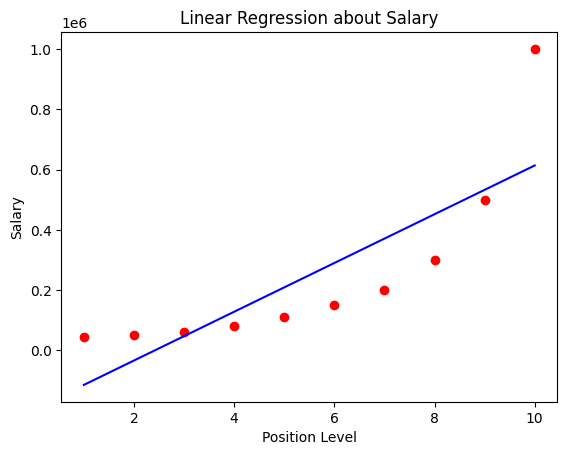

In [68]:
from matplotlib import pyplot as plt

plt.scatter(X,y,color='red')
plt.plot(X,linear_model.predict(X),color='blue')
plt.title("Linear Regression about Salary")
plt.xlabel('Position Level')
plt.ylabel('Salary')

plt.show()

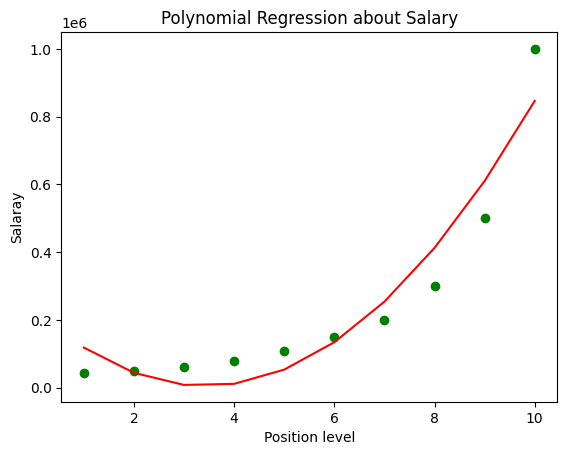

In [69]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color='green')
plt.plot(X,Polymodel.predict(set_polyX),color='red')
plt.title('Polynomial Regression about Salary')
plt.xlabel('Position level')
plt.ylabel('Salaray')
plt.show()

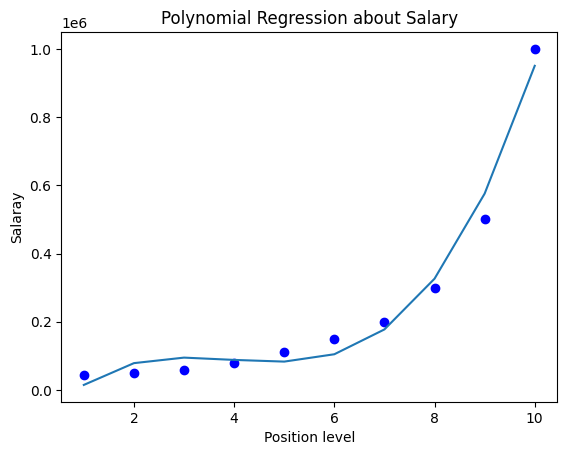

In [70]:
more_power = PolynomialFeatures(degree=3)
XPoly = more_power.fit_transform(X)
Ltrs = LinearRegression()
Ply_3model = Ltrs.fit(XPoly,y)

plt.scatter(X,y,color='blue')
plt.plot(X,Ply_3model.predict(XPoly))
plt.title('Polynomial Regression about Salary')
plt.xlabel('Position level')
plt.ylabel('Salaray')
plt.show()

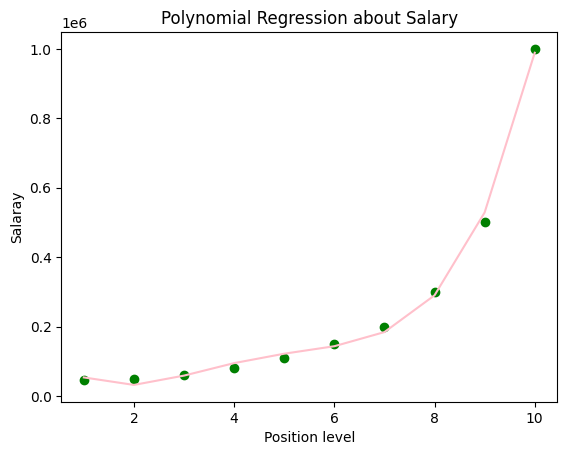

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
pln= PolynomialFeatures(degree= 4)
X_conv = pln.fit_transform(X)
line= LinearRegression()
new_model= line.fit(X_conv,y)


plt.scatter(X,y,color='green')
plt.plot(X,new_model.predict(X_conv),color='pink')

plt.title('Polynomial Regression about Salary')
plt.xlabel('Position level')
plt.ylabel('Salaray')
plt.show()

<ipython-input-72-f376f87e43b2>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X),max(X),0.1)


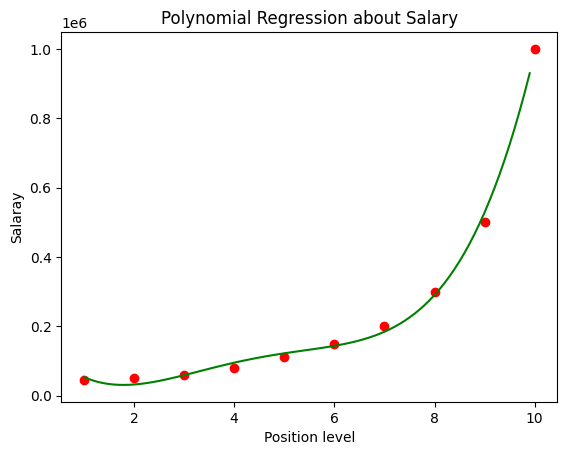

In [72]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
pln_X_grid = pln.fit_transform(X_grid)
plt.scatter(X,y,color='red')
plt.plot(X_grid, new_model.predict(pln_X_grid),color='green')

plt.title('Polynomial Regression about Salary')
plt.xlabel('Position level')
plt.ylabel('Salaray')
plt.show()


In [73]:
linear_model.predict([[6.5]])

array([330378.78787879])

In [74]:
new_model.predict(pln.fit_transform([[6.5]]))

array([158862.45265155])

In [75]:
new_model.predict(pln.fit_transform([[11]]))

array([1780833.33333358])

In [79]:
print(round(new_model.intercept_,1))
print(np.round(new_model.coef_,1))

184166.7
[      0.  -211002.3   94765.4  -15463.3     890.2]


Equation = 184166.7- 211002.3x+ 94765.4x^2 -15463.3X^3 + 890.2x^4


In [80]:
import joblib

joblib.dump(new_model,'plynomial.pkl')

['plynomial.pkl']

In [83]:
load_joblib= joblib.load('plynomial.pkl')
load_joblib.predict(pln.fit_transform([[2]]))

array([31759.90675984])